## Imports

Make sure treefarms is installed in your environment and that your working directory is outside the treeFarms folder.

In [1]:
import pandas as pd
import numpy as np
import os
import pathlib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from treefarms.model.threshold_guess import compute_thresholds, cut
from treefarms import TREEFARMS
from treefarms.model.model_set import ModelSetContainer
import json
import matplotlib.pyplot as plt
import random

## Dataset and visualization from tutorial.ipynb

In [2]:
homepath = os.getcwd()

In [3]:
# read the dataset
df = pd.read_csv(f"{homepath}/treeFarms/experiments/datasets/compas/binned.csv")
X, y = df.iloc[:, :-1], df.iloc[:, -1]
h = df.columns[:-1]
df


,sex:Female,age:<21,age:<23,age:<26,age:<46,juvenile-felonies:=0,juvenile-misdemeanors:=0,juvenile-crimes:=0,priors:=0,priors:=1,priors:2-3,priors:>3,recidivate-within-two-years:1
0,0,0,0,0,0,1,1,1,1,0,0,0,0
1,0,0,0,0,1,1,1,1,1,0,0,0,1
2,0,0,1,1,1,1,1,0,0,0,0,1,1
3,0,0,0,0,1,1,1,1,1,0,0,0,0
4,0,0,0,0,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,0,0,1,1,1,1,1,1,1,0,0,0,0
6903,0,0,1,1,1,1,1,1,1,0,0,0,0
6904,0,0,0,0,0,1,1,1,1,0,0,0,0
6905,1,0,0,0,1,1,1,1,0,0,1,0,0


We fit the Rashomon set on the COMPAS dataset.


In [4]:
# train TREEFARMS model
config = {
    "regularization": 0.01,  # regularization penalizes the tree with more leaves. We recommend to set it to relative high value to find a sparse tree.
    "rashomon_bound_multiplier": 0.05,  # rashomon bound multiplier indicates how large of a Rashomon set would you like to get
}

model = TREEFARMS(config)

model.fit(X, y)


null
treefarms reported successful executionFinding Optimal Objective...

training completed. Number of trees in the Rashomon set: 1422


{
  "false": {
    "false": {
      "complexity": 0.009999999776482582,
      "loss": 0.021861879155039787,
      "name": "recidivate-within-two-years:1",
      "prediction": 1
    },
    "feature": 7,
    "name": "juvenile-crimes:=0",
    "reference": 1,
    "relation": "==",
    "true": {
      "complexity": 0.009999999776482582,
      "loss": 0.21644708514213562,
      "name": "recidivate-within-two-years:1",
      "prediction": 0
    },
    "type": "integral"
  },
  "feature": 11,
  "model_objective": 0.3748675286769867,
  "name": "priors:>3",
  "reference": 1,
  "relation": "==",
  "true": {
    "complexity": 0.009999999776482582,
    "loss": 0.10655856132507324,
    "name": "recidivate-within-two-years:1",
    "prediction": 1
  },
  "type": "integral"
}
{
  "false": {
    "complexity": 0.009999999776482582,
    "loss": 0.03938033804297447,
    "name": "recidivate-within-two-years:1",
    "prediction": 1
  },
  "feature": 7,
  "model_objective": 0.3748675286769867,
  "name": "juve

We then visualize the Rashomon set. 

In [5]:
# TREEFARMS will attempt to obtain feature names from the DataFrame columns.
# However, it is also possible to manually set this value, such as the
# commented code snippet below

feature_names = df.columns

feature_description = {
    "sex": {"info": "Sex", "type": "is", "short": "Sex"},
    "age": {"info": "Age", "type": "count", "short": "Age"},
    "juvenile-felonies": {
        "info": "Number of juvenile felonies",
        "type": "count",
        "short": "Juv felony",
    },
    "juvenile-misdemeanors": {
        "info": "Number of juvenile misdemeanors",
        "type": "count",
        "short": "Juv misdemeanor",
    },
    "juvenile-crimes": {
        "info": "Number of juvenile crimes",
        "type": "count",
        "short": "Juv crime",
    },
    "priors": {
        "info": "Number of prior crimes",
        "type": "count",
        "short": "Prior crime",
    },
    "recidivate-within-two-years": {
        "info": "Has recidivated within two years",
        "type": "yes",
        "short": "Recidivated",
    },
}
model.visualize(feature_names, feature_description)

# model.visualize() # default visualization


Generating decision paths from 1422 trees: 100%|██████████| 1422/1422 [00:07<00:00, 180.49it/s]


<iframe
 srcdoc="<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1.0" /><title>TimberTrek</title><style>html{font-size:16px;-moz-osx-font-smoothing:grayscale;-webkit-font-smoothing:antialiased;text-rendering:optimizeLegibility;-webkit-text-size-adjust:100%;-moz-text-size-adjust:100%}html,body{position:relative;width:100%;height:100%}body{margin:0;padding:0;box-sizing:border-box;font-family:-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Oxygen-Sans,Ubuntu,Cantarell,Helvetica Neue,sans-serif;color:#4a4a4a;font-size:1em;font-weight:400;line-height:1.5}*,:after,:before{box-sizing:inherit}a{color:#0064c8;text-decoration:none}a:hover{text-decoration:underline}a:visited{color:#0050a0}label{display:block}input,button,select,textarea{font-family:inherit;font-size:inherit;-webkit-padding:.4em 0;padding:.4em;margin:0 0 .5em;box-sizing:border-box;border:1px solid #ccc;border-radius:2px}input:disabled{color:#ccc}button{color:#333;background-color:#f4f4f4;outline:none}button:disabled{color:#999}button:not(:disabled):active{background-color:#ddd}button:focus{border-color:#666}</style><script defer src='data:text/javascript;base64,dmFyIEk3PU9iamVjdC5kZWZpbmVQcm9wZXJ0eTt2YXIgRjc9KGllLHplLFMpPT56ZSBpbiBpZT9JNyhpZSx6ZSx7ZW51bWVyYWJsZTohMCxjb25maWd1cmFibGU6ITAsd3JpdGFibGU6ITAsdmFsdWU6U30pOmllW3plXT1TO3ZhciBBPShpZSx6ZSxTKT0+KEY3KGllLHR5cGVvZiB6ZSE9InN5bWJvbCI/emUrIiI6emUsUyksUyksbDI9KGllLHplLFMpPT57aWYoIXplLmhhcyhpZSkpdGhyb3cgVHlwZUVycm9yKCJDYW5ub3QgIitTKX07dmFyIEJsPShpZSx6ZSxTKT0+KGwyKGllLHplLCJyZWFkIGZyb20gcHJpdmF0ZSBmaWVsZCIpLFM/Uy5jYWxsKGllKTp6ZS5nZXQoaWUpKSx2ZT0oaWUsemUsUyk9PntpZih6ZS5oYXMoaWUpKXRocm93IFR5cGVFcnJvcigiQ2Fubm90IGFkZCB0aGUgc2FtZSBwcml2YXRlIG1lbWJlciBtb3JlIHRoYW4gb25jZSIpO3plIGluc3RhbmNlb2YgV2Vha1NldD96ZS5hZGQoaWUpOnplLnNldChpZSxTKX07dmFyIHNlPShpZSx6ZSxTKT0+KGwyKGllLHplLCJhY2Nlc3MgcHJpdmF0ZSBtZXRob2QiKSxTKTt2YXIgdGltYmVydHJlaz1mdW5jdGlvbigpe3ZhciAkcyxjMixlYSx1Mix0YSxoMixuYSxmMixyYSxkMixpYSxwMixzYSxtMixhYSxnMixvYSx2MixsYSx3MixsbixucixjYSx5Mix6aSxZbCx1YSxiMixEaSxoYSx4MixWaSxHbCxmYSxDMixkYSxrMixwYSxTMixtYSxfMixnYSxMMix2YSxUMix3YSxNMixTbixacixBaSxYbCxGcixWYSxQcixBYSx5YSx6MixiYSxEMixfbixCcixJaSxKbCx4YSxWMixDYSxBMixrYSxJMixTYSxGMixfYSxQMixMYSxIMixUYSxFMixNYSxSMixGaSxRbDsidXNlIHN0cmljdCI7ZnVuY3Rpb24gaWUoKXt9Y29uc3QgemU9ZT0+ZTtmdW5jdGlvbiBTKGUsdCxuLHIsaSl7ZS5fX3N2ZWx0ZV9tZXRhPXtsb2M6e2ZpbGU6dCxsaW5lOm4sY29sdW1uOnIsY2hhcjppfX19ZnVuY3Rpb24gS2woZSl7cmV0dXJuIGUoKX1mdW5jdGlvbiAkbCgpe3JldHVybiBPYmplY3QuY3JlYXRlKG51bGwpfWZ1bmN0aW9uIEhlKGUpe2UuZm9yRWFjaChLbCl9ZnVuY3Rpb24gcnIoZSl7cmV0dXJuIHR5cGVvZiBlPT0iZnVuY3Rpb24ifWZ1bmN0aW9uIEtlKGUsdCl7cmV0dXJuIGUhPWU/dD09dDplIT09dHx8ZSYmdHlwZW9mIGU9PSJvYmplY3QifHx0eXBlb2YgZT09ImZ1bmN0aW9uIn1sZXQgWmk7ZnVuY3Rpb24gWXIoZSx0KXtyZXR1cm4gWml8fChaaT1kb2N1bWVudC5jcmVhdGVFbGVtZW50KCJhIikpLFppLmhyZWY9dCxlPT09WmkuaHJlZn1mdW5jdGlvbiBOMihlKXtyZXR1cm4gT2JqZWN0LmtleXMoZSkubGVuZ3RoPT09MH1jb25zdCBlMT10eXBlb2Ygd2luZG93PCJ1IjtsZXQgSWE9ZTE/KCk9PndpbmRvdy5wZXJmb3JtYW5jZS5ub3coKTooKT0+RGF0ZS5ub3coKSxGYT1lMT9lPT5yZXF1ZXN0QW5pbWF0aW9uRnJhbWUoZSk6aWU7Y29uc3QgaXI9bmV3IFNldDtmdW5jdGlvbiB0MShlKXtpci5mb3JFYWNoKHQ9Pnt0LmMoZSl8fChpci5kZWxldGUodCksdC5mKCkpfSksaXIuc2l6ZSE9PTAmJkZhKHQxKX1mdW5jdGlvbiBQYShlKXtsZXQgdDtyZXR1cm4gaXIuc2l6ZT09PTAmJkZhKHQxKSx7cHJvbWlzZTpuZXcgUHJvbWlzZShuPT57aXIuYWRkKHQ9e2M6ZSxmOm59KX0pLGFib3J0KCl7aXIuZGVsZXRlKHQpfX19ZnVuY3Rpb24gbjEoZSx0KXtlLmFwcGVuZENoaWxkKHQpfWZ1bmN0aW9uIFZ0KGUsdCxuKXtjb25zdCByPUhhKGUpO2lmKCFyLmdldEVsZW1lbnRCeUlkKHQpKXtjb25zdCBpPV8oInN0eWxlIik7aS5pZD10LGkudGV4dENvbnRlbnQ9bixyMShyLGkpfX1mdW5jdGlvbiBIYShlKXtpZighZSlyZXR1cm4gZG9jdW1lbnQ7Y29uc3QgdD1lLmdldFJvb3ROb2RlP2UuZ2V0Um9vdE5vZGUoKTplLm93bmVyRG9jdW1lbnQ7cmV0dXJuIHQmJnQuaG9zdD90OmUub3duZXJEb2N1bWVudH1mdW5jdGlvbiBXMihlKXtjb25zdCB0PV8oInN0eWxlIik7cmV0dXJuIHIxKEhhKGUpLHQpLHQuc2hlZXR9ZnVuY3Rpb24gcjEoZSx0KXtyZXR1cm4gbjEoZS5oZWFkfHxlLHQpLHQuc2hlZXR9ZnVuY3Rpb24gaTEoZSx0LG4pe2UuaW5zZXJ0QmVmb3JlKHQsbnx8bnVsbCl9ZnVuY3Rpb24gQmkoZSl7ZS5wYXJlbnROb2RlLnJlbW92ZUNoaWxkKGUpfWZ1bmN0aW9uIGV

It is also possible to obtain individual trees from the Rashomon set. The following cell demonstrates getting the accuracy of the first tree in the Rashomon set as well as printing out its structure.

In [6]:
first_tree = model[0]
print(f'The accuracy of the first tree on the data is: {first_tree.score(X, y)}')
print(model[0])

The accuracy of the first tree on the data is: 0.6565802808744752
if feature_11 = true then:
    predicted Prediction: 1

else if feature_11 != true and feature_7 = true then:
    predicted Prediction: 0

else if feature_0 = true and feature_11 != true and feature_7 != true and feature_8 = true then:
    predicted Prediction: 1

else if feature_0 = true and feature_11 != true and feature_7 != true and feature_8 != true then:
    predicted Prediction: 0

else if feature_0 != true and feature_11 != true and feature_7 != true then:
    predicted Prediction: 1


## Finding the greedy trees past a certain depth

Taken from train_greedy.py file:

In [7]:
def entropy(ps): 
    """
    Calculate the entropy of a given list of binary labels.
    ps[0] looks like it's the proportion of positive labels, 
    ps[1] is proportion of negative ones.
    """
    p_positive = ps[0]
    if p_positive == 0 or p_positive == 1:
        return 0  # Entropy is 0 if all labels are the same
    entropy_val = - (p_positive * np.log2(p_positive) +
                        (1 - p_positive) * np.log2(1 - p_positive))
    return entropy_val

In [8]:
def find_best_feature_to_split_on(X_train,y_train):
        num_features = X_train.shape[1]
        max_gain = -10
        gain_of_feature_to_split = 0
        p_original = np.mean(y_train) # mean of all training labels (aka percentage that are pos)
        entropy_original = entropy([p_original, 1-p_original]) # get entropy of all data (basically treating it like a tree with 1 leaf)
        best_feature = -1
        for feature in range(num_features):
            # Left child labels
            p_left = np.mean(y_train[X_train.iloc[:, feature] == 1])
            
            # Right child labels
            p_right = np.mean(y_train[X_train.iloc[:, feature] == 0])

            p_left = 0 if np.isnan(p_left) else p_left
            p_right = 0 if np.isnan(p_right) else p_right
        
            entropy_left = entropy(np.array([p_left, 1 - p_left]))
            
            entropy_right = entropy(np.array([p_right, 1 - p_right]))
            
            proportion_of_examples_in_left_leaf = (np.sum(X_train.iloc[:, feature] == 1) / len(X_train))
            proportion_of_examples_in_right_leaf = (np.sum(X_train.iloc[:, feature] == 0) / len(X_train))
            gain = entropy_original - ( proportion_of_examples_in_left_leaf* entropy_left +
                                        proportion_of_examples_in_right_leaf* entropy_right)
            if gain >= max_gain:
                max_gain = gain
                best_feature = feature

        return best_feature

From me:

In [9]:
def go_to_depth(tree_json, X, y, depth): 
    # could add X and y as input, (subtree, X, y)
    # tree is json version of tree classifier object
    if type(tree_json) != dict:
        tree_json = json.loads(tree_json.json())

    # base case, tree is just a leaf
    if "true" not in tree_json:
        return [(tree_json, None, None)]
    # correct depth reached
    if depth == 1:
        return [(tree_json, X, y)]
        # get subsets of X and y for true and false
    # recursion, keep going
    # make sure the recursive calls also call on the subsets of X and y for each tree
    else: 
        split_feature = tree_json["feature"]
        X_left = X[X.iloc[:, split_feature] == True]
        y_left = y[X.iloc[:, split_feature] == True]
        X_right = X[X.iloc[:, split_feature] == False]
        y_right = y[X.iloc[:, split_feature] == False]
        # print(X_left)
        # print(X_right)
        left_tree = go_to_depth(tree_json["true"], X_left, y_left, depth-1)
        right_tree = go_to_depth(tree_json["false"], X_right, y_right, depth-1)
        return left_tree + right_tree 
        # returns list with all subtrees as tuples (tree, data in tree, labels in tree)

In [10]:
def is_greedy(tree, X_train, y_train, verbose = 0):
    # check if first split of tree is greedy or not.
    # if tree is a leaf, all leaves are considered greedy
    if "prediction" in tree:
        return True
    # else check if it split on the greediest feature
    else:
        best_feature = find_best_feature_to_split_on(X_train, y_train)
        if verbose == 1:
            print("Feature for greediest split:", best_feature)
            print("Feature tree makes split on:", tree["feature"])
        if tree["feature"] == best_feature:
            return True
        return False

In [11]:
def check_greedy(tree, X_train, y_train, depth, calls = 1, verbose=0):
    # tree is tree classifier object -> json
    # X_train, y_train are data and labels
    # depth is how deep to start checking
    # Returns True (tree is greedy past depth) or False

    # step 0. turn tree classifier into json
    if type(tree) != dict:
        tree_json = json.loads(tree.json())
    else:
        tree_json = tree
    if verbose:
        print("Current depth:", calls)
    # step 1. go to specified depth of tree, get left and right trees 
    # and X, y associated with them
    subtrees = go_to_depth(tree_json, X_train, y_train, depth) 
    results = []
    for tree in subtrees:
        if "prediction" in tree[0]: # check if this tree is leaf
            results.append(True)
        else: # first split is greedy, keep checking
            greedy_flag = is_greedy(tree[0], tree[1], tree[2], verbose)
            if not greedy_flag: # check if first split is greedy
                return False
            results.append(check_greedy(tree[0], tree[1], tree[2], depth = 2, 
                            calls = calls + 1, verbose = verbose))
    return all(results)
        

### Evaluation

#### Graphing number of greedy trees per depth

In [12]:
# from https://stackoverflow.com/questions/70030886/how-to-retrieve-the-depth-of-nested-dictionaries-in-nested-dictionaries-in-pytho
def max_depth(d):
    if isinstance(d, dict):
        return 1 + max((max_depth(value) for value in d.values()), default=0)
    return 0

In [13]:
greedy_dict = dict()
num_greedy = dict()

for depth in range(1, 7):
    greedy_list = []
    for i in range(model.model_set.get_tree_count()):
        greedy_list.append(check_greedy(model[i], X, y, depth=depth))
    tree_ind = np.nonzero(greedy_list)[0].tolist()
    num_greedy[depth] = sum(greedy_list)
    greedy_dict[depth] = tree_ind


In [14]:
num_trees_per_depth = dict()
tree_ind_per_depth = dict()

for i in range(model.model_set.get_tree_count()):
    tree_depth = max_depth(json.loads(model[i].json()))
    if tree_depth in num_trees_per_depth:
        num_trees_per_depth[tree_depth] += 1
        tree_ind_per_depth[tree_depth] += [i]
    else:
        num_trees_per_depth[tree_depth] = 1
        tree_ind_per_depth[tree_depth] = [i]

In [15]:
num_greedy

{1: 4, 2: 28, 3: 237, 4: 763, 5: 1324, 6: 1422}

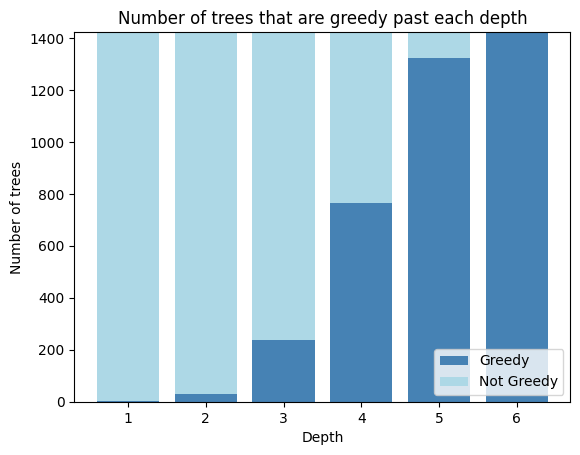

In [16]:
plt.bar(num_greedy.keys(), num_greedy.values(), 
        color = "steelblue", label = "Greedy")
plt.bar(num_greedy.keys(), [(model.model_set.get_tree_count() - value) for value in num_greedy.values()],
        bottom=num_greedy.values(), color='lightblue', label = "Not Greedy")
# plt.bar(num_greedy.keys(), num_trees_per_depth_list, 
#          color="orange", label="Number of trees that have this depth")
plt.title("Number of trees that are greedy past each depth")
plt.xlabel("Depth")
plt.ylabel("Number of trees")
plt.legend(loc="lower right")
plt.show()

The maximum depth of a tree in this model is 6, and all leaves are treated as greedy, so all trees are considered greedy after depth 6.

#### Comparing score functions

In [17]:
greedy_scores = dict()
for depth in greedy_dict:
    greedy_score = []
    for tree_ind in greedy_dict[depth]:
        greedy_score.append(model[tree_ind].score(X, y))
    greedy_scores[depth] = np.mean(greedy_score)

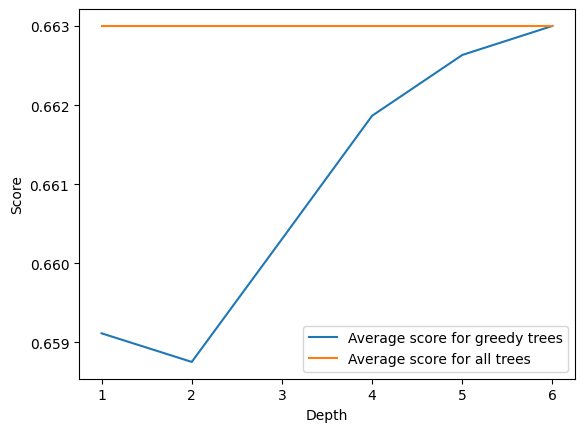

In [18]:
plt.plot(greedy_scores.keys(), greedy_scores.values(), 
        label="Average score for greedy trees")
plt.plot(greedy_scores.keys(), [list(greedy_scores.values())[-1]] * len(greedy_scores.values()),
        label = "Average score for all trees")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

Based on the last two graphs alone, I think that taking the subset of trees that are greedy past depth 4 for this dataset is a pretty good representative subset of the data. It slashes the size of the Rashomon set in half, and on average only does worse than the rest of the dataset by about 0.001.

Then again, you also have to take into account the fact that this includes all trees of only depth 2 and 3. 

### Feature Importance (Permutation importances)

In [19]:
# method i wrote for HW 2 of this class
def permutation_importance(validation_data, validation_label, model, reps=30):
    original_score = model.score(validation_data, validation_label)
    perm_imp = dict()
    for feature in validation_data.columns:
        scrambled_scores = []
        for k in range(reps):
            validation_data_copy = validation_data.copy()
            validation_data_copy[f"{feature}"] = \
                np.random.permutation(np.asarray(validation_data_copy[f"{feature}"]))
            scrambled_score = model.score(validation_data_copy, validation_label)
            scrambled_scores.append(scrambled_score)
        
        perm_imp[f"{feature}"] = original_score - np.mean(scrambled_scores)
    
    return perm_imp

In [20]:
from sklearn.model_selection import train_test_split

# train treefarms model on training dataset instead of full dataset this time
config = {
    "regularization": 0.01,
    "rashomon_bound_multiplier": 0.05,
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

model2 = TREEFARMS(config)
model2.fit(X_train, y_train)

null
treefarms reported successful execution
Finding Optimal Objective...
{
  "false": {
    "false": {
      "complexity": 0.009999999776482582,
      "loss": 0.2085445374250412,
      "name": "recidivate-within-two-years:1",
      "prediction": 0
    },
    "feature": 1,
    "name": "age:<21",
    "reference": 1,
    "relation": "==",
    "true": {
      "complexity": 0.009999999776482582,
      "loss": 0.044170890003442764,
      "name": "recidivate-within-two-years:1",
      "prediction": 1
    },
    "type": "integral"
  },
  "feature": 11,
  "model_objective": 0.3906082808971405,
  "name": "priors:>3",
  "reference": 1,
  "relation": "==",
  "true": {
    "complexity": 0.009999999776482582,
    "loss": 0.10789283365011215,
    "name": "recidivate-within-two-years:1",
    "prediction": 1
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "complexity": 0.009999999776482582,
      "loss": 0.2085445374250412,
      "name": "recidivate-within-two-years:1",
      "predicti

"priors:>3",
    "reference": 1,
    "relation": "==",
    "true": {
      "complexity": 0.009999999776482582,
      "loss": 0.10789283365011215,
      "name": "recidivate-within-two-years:1",
      "prediction": 1
    },
    "type": "integral"
  },
  "feature": 1,
  "model_objective": 0.3906082510948181,
  "name": "age:<21",
  "reference": 1,
  "relation": "==",
  "true": {
    "complexity": 0.009999999776482582,
    "loss": 0.044170890003442764,
    "name": "recidivate-within-two-years:1",
    "prediction": 1
  },
  "type": "integral"
}


In [21]:
greedy_dict2 = dict()
num_greedy2 = dict()

for depth in range(1, 7):
    greedy_list = []
    for i in range(model2.model_set.get_tree_count()):
        greedy_list.append(check_greedy(model2[i], X_train, y_train, depth=depth))
    tree_ind = np.nonzero(greedy_list)[0].tolist()
    num_greedy2[depth] = sum(greedy_list)
    greedy_dict2[depth] = tree_ind

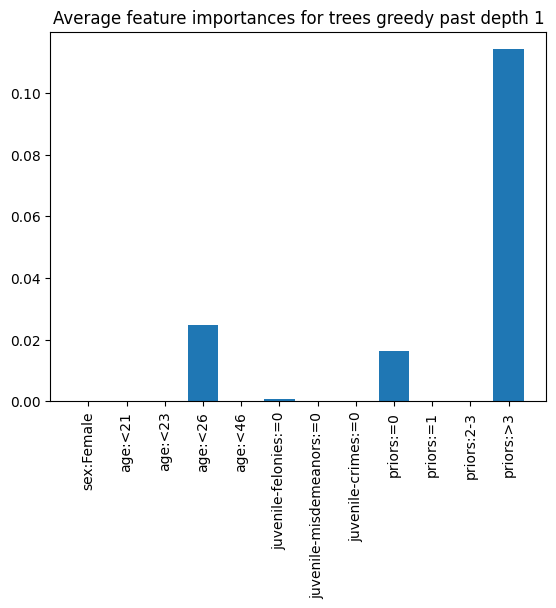

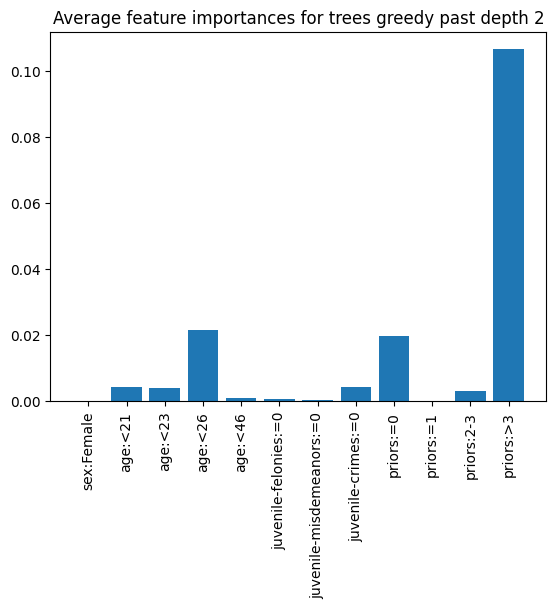

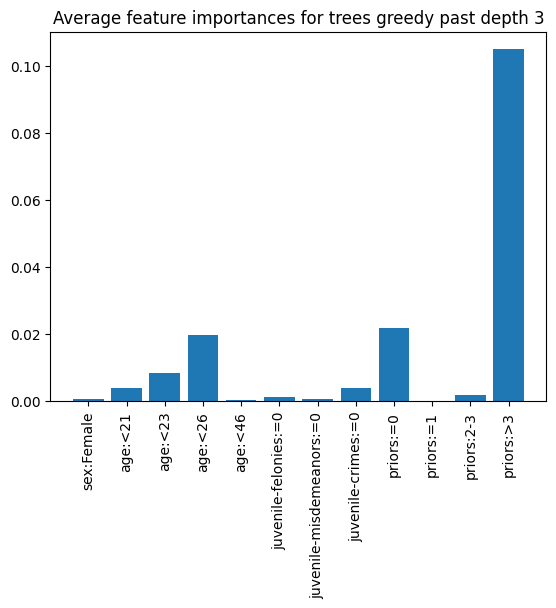

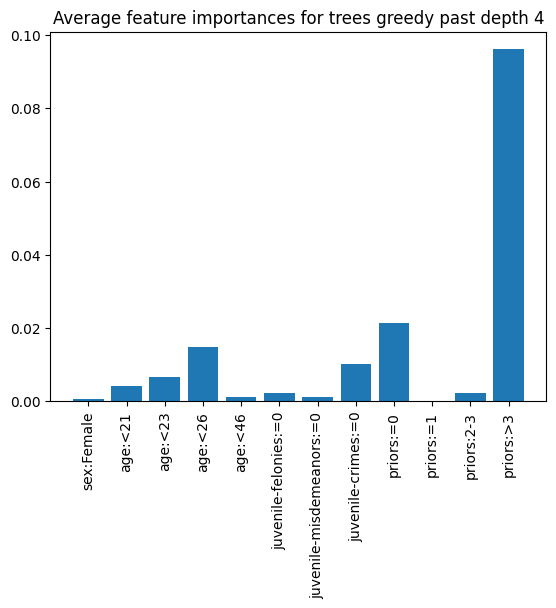

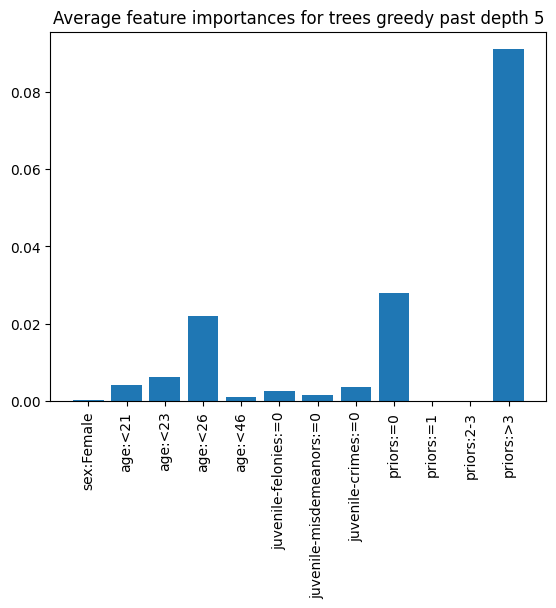

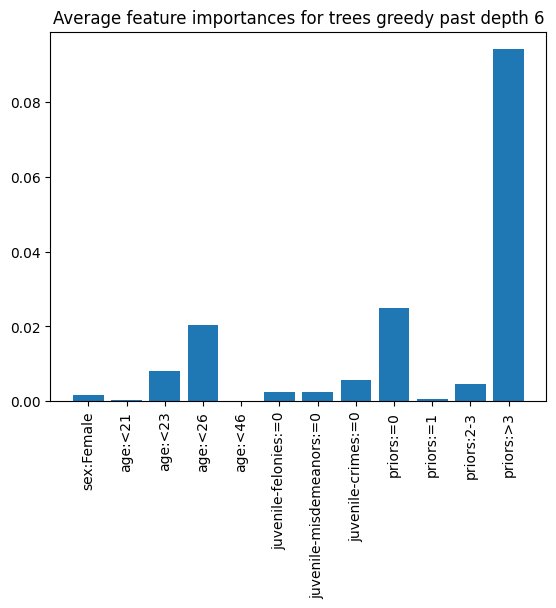

In [ ]:
perm_importances_by_depth = {}

for depth in range(1, 7): 
    perm_imps = pd.DataFrame(columns=X_test.columns)
    if len(greedy_dict2[depth]) >= 20:
        sample_idxs = random.sample(greedy_dict2[depth], 20)
        for i, idx in enumerate(sample_idxs):
            perm_imps.loc[i, :] = permutation_importance(X_test, y_test, model2[idx], reps=5)
    else:
        for i, idx in enumerate(greedy_dict2[depth]):  
            perm_imps.loc[i, :] = permutation_importance(X_test, y_test, model2[idx], reps=5)
    perm_importances_by_depth[depth] = perm_imps
    
    plt.figure()
    plt.bar(perm_imps.columns, np.mean(perm_imps, axis=0))
    plt.xticks(rotation=90)
    plt.title(f"Average feature importances for trees greedy past depth {depth}")
    plt.show()

In [ ]:
# save permutation importances
dict_perm_imps = {depth: df.to_dict() for depth, df in perm_importances_by_depth.items()}
with open("perm_imps_test.json", "w") as outfile:
    json.dump(dict_perm_imps, outfile)

In [22]:
# load permutation importances
with open("perm_imps_test.json", "r") as infile:
    loaded_data = json.load(infile)

perm_importances_by_depth = {depth: pd.DataFrame(data) \
    for depth, data in loaded_data.items()}

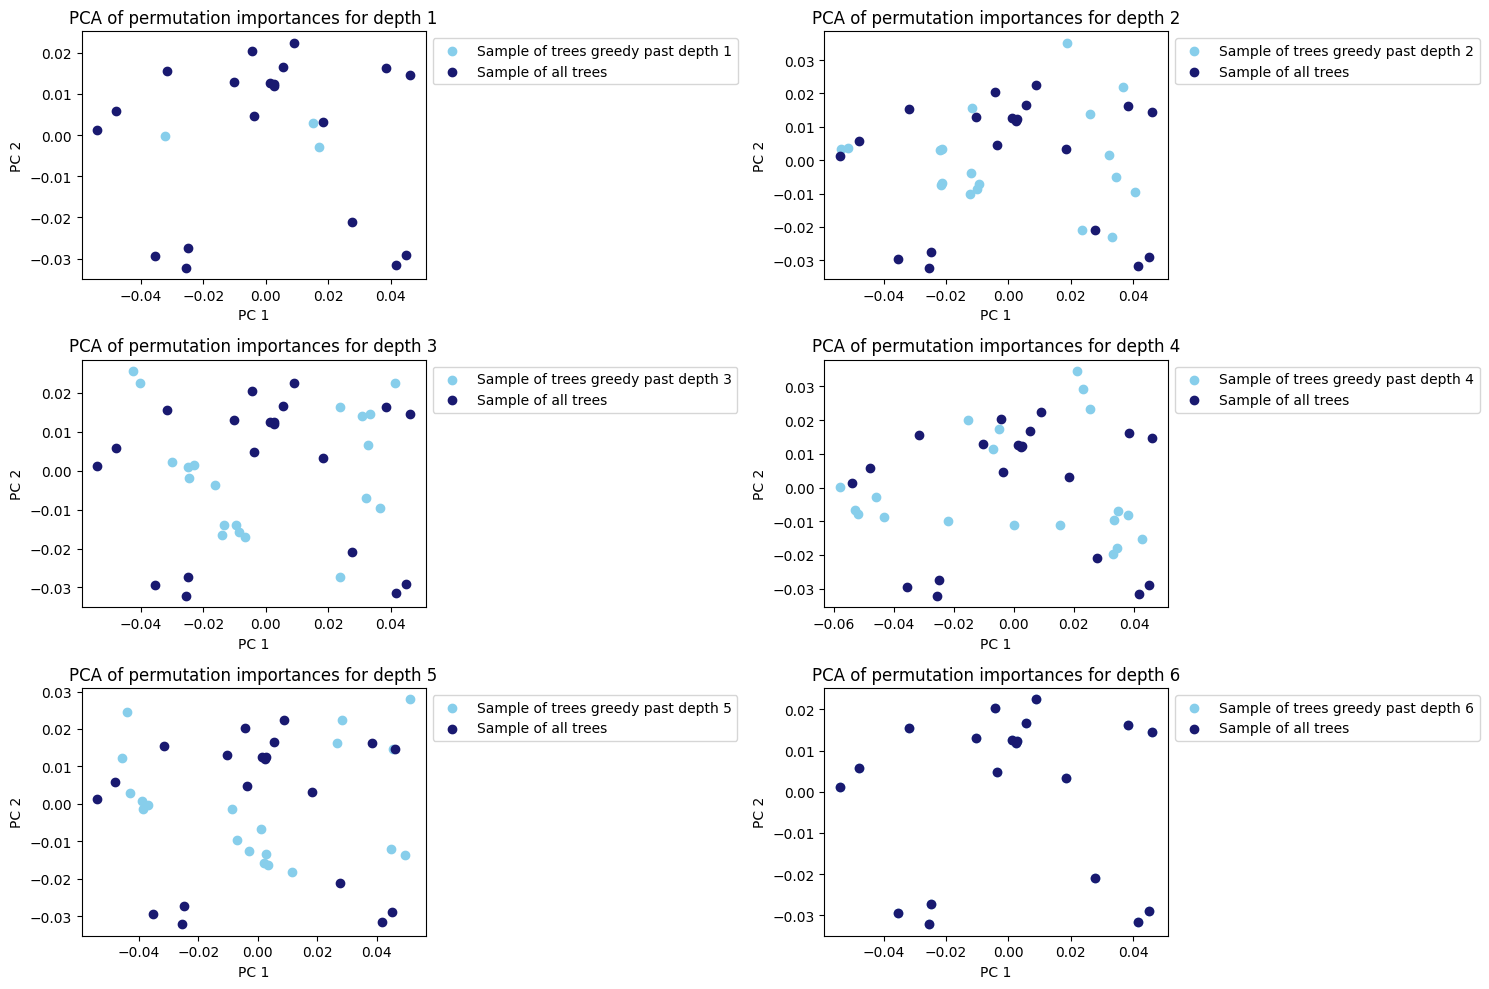

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten() 

for i, depth in enumerate(perm_importances_by_depth):
    pca = PCA()
    Xt = pca.fit_transform(perm_importances_by_depth[str(depth)])
    Xt_full = pca.fit_transform(perm_importances_by_depth["6"])
    
    ax = axes[i]
    ax.scatter(Xt[:, 0], Xt[:, 1], c="skyblue", label=f"Sample of trees greedy past depth {depth}")
    ax.scatter(Xt_full[:, 0], Xt_full[:, 1], c="midnightblue", label="Sample of all trees")
    ax.legend(bbox_to_anchor=(1, 1))
    ax.set_title(f"PCA of permutation importances for depth {depth}")
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")

plt.tight_layout()
plt.show()

Again, the graph for depth 6 represents all trees in the Rashomon set. Since none of them make splits beyond that depth, they are all considered greedy.

By performing PCA on the permutation importances treated as a vector, you can see the way that each subset occupies a different space compared to the whole Rashomon set. There is some randomness because I had to take samples of the trees to get the permutation importances since it took a long time to run, but some interesting observations are that the very few trees that are fully greedy (past depth 1) are around the center, and that the subsets for depths 2 and 4, as well as 3 and 5 make similar patterns to each other.

## Bike dataset

In [24]:
bike_df = pd.read_csv("/hpc/group/csdept/ts518/treeFarms/experiments/datasets/bike_binary.csv")
bike_X, bike_y = bike_df.iloc[:, :-1], bike_df.iloc[:, -1]
bike_df

,instant<=-1.2416709661483765,instant<=-1.2127693891525269,instant<=0.0991622619330883,instant<=0.30366575717926025,season<=-0.9048906862735748,hr<=-0.8745151460170746,hr<=-0.7298895418643951,hr<=-0.5852639377117157,hr<=1.4394944906234741,hr<=1.5841200947761536,...,temp<=-0.6594813466072083,temp<=-0.2440180405974388,temp<=-0.1401522234082222,atemp<=-0.8729992210865021,atemp<=0.7141387462615967,atemp<=0.802296906709671,hum<=0.0402797251008451,hum<=0.6104351878166199,hum<=0.8695967793464661,cnt_binary
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0,0,0,0,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
17375,0,0,0,0,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
17376,0,0,0,0,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
17377,0,0,0,0,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,0


In [25]:
bike_X_train, bike_X_test, bike_y_train, bike_y_test = train_test_split(bike_X, bike_y, 
                                                                        test_size = 0.8)

In [29]:
bike_X_train_guessed, thresholds, header, threshold_guess_time = \
    compute_thresholds(bike_X_train.copy(), bike_y_train.copy(), 5, 4)
bike_X_test_guessed = cut(bike_X_test.copy(), thresholds)
bike_X_test_guessed = bike_X_test_guessed[header]
# print(bike_X_train_guessed.shape) # 10 features
# print(bike_X_test_guessed.shape)
# print("train set column names == test set column names: {}".format(list(bike_X_train_guessed.columns)==list(bike_X_test_guessed.columns)))

config2 = {'regularization': 0.01, 
            'rashomon_bound_multiplier': 0.05,
            'depth_budget':5}
model3_5 = TREEFARMS(config2)
model3_5.fit(bike_X_train_guessed, bike_y_train)

null
Finding Optimal Objective...
treefarms reported successful execution
training completed. Number of trees in the Rashomon set: 48
{
  "false": {
    "false": {
      "complexity": 0.009999999776482582,
      "loss": 0.0077697839587926865,
      "name": "cnt_binary",
      "prediction": 0
    },
    "feature": 3,
    "name": "hr<=-0.7298895418643951<=0.5",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.02071942389011383,
        "name": "cnt_binary",
        "prediction": 0
      },
      "feature": 0,
      "name": "instant<=-1.2416709661483765<=0.5",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.11165466904640198,
        "name": "cnt_binary",
        "prediction": 1
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 5,
  "model_objective": 0.18705034255981445,
  "name": "hr<=1.584120094

4474817514,
        "name": "cnt_binary",
        "prediction": 0
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "complexity": 0.009999999776482582,
      "loss": 0.02071942389011383,
      "name": "cnt_binary",
      "prediction": 0
    },
    "feature": 0,
    "name": "instant<=-1.2416709661483765<=0.5",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0077697839587926865,
        "name": "cnt_binary",
        "prediction": 0
      },
      "feature": 3,
      "name": "hr<=-0.7298895418643951<=0.5",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.11165466904640198,
        "name": "cnt_binary",
        "prediction": 1
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 5,
  "model_objective": 0.18705034255981445,
  

In [30]:
greedy_dict3 = dict()
num_greedy3 = dict()

for depth in range(1, config2["depth_budget"] + 1):
    greedy_list = []
    for i in range(model3_5.model_set.get_tree_count()):
        greedy_list.append(check_greedy(model3_5[i], bike_X_train_guessed, bike_y_train, depth=depth))
    tree_ind = np.nonzero(greedy_list)[0].tolist()
    num_greedy3[depth] = sum(greedy_list)
    greedy_dict3[depth] = tree_ind

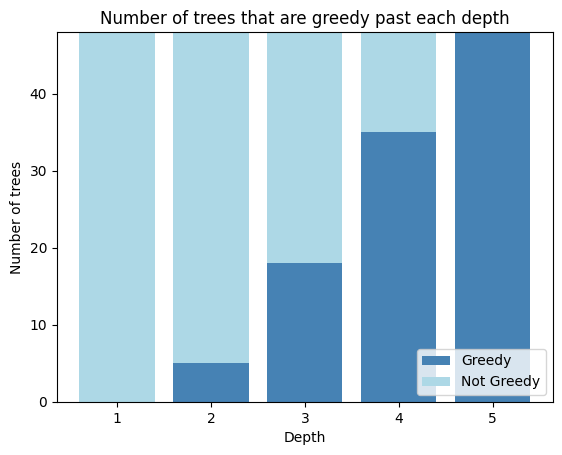

In [31]:
plt.bar(num_greedy3.keys(), num_greedy3.values(), 
        color = "steelblue", label = "Greedy")
plt.bar(num_greedy3.keys(), [(model3_5.model_set.get_tree_count() - value) for value in num_greedy3.values()],
        bottom=num_greedy3.values(), color='lightblue', label = "Not Greedy")

plt.title("Number of trees that are greedy past each depth")
plt.xlabel("Depth")
plt.ylabel("Number of trees")
plt.legend(loc="lower right")
plt.show()

In [32]:
greedy_scores3 = dict()
for depth in greedy_dict3:
    greedy_score = []
    for tree_ind in greedy_dict3[depth]:
        greedy_score.append(model3_5[tree_ind].score(bike_X_train_guessed, bike_y_train))
    greedy_scores3[depth] = np.mean(greedy_score)

/hpc/home/ts518/.local/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/hpc/home/ts518/.local/lib/python3.9/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


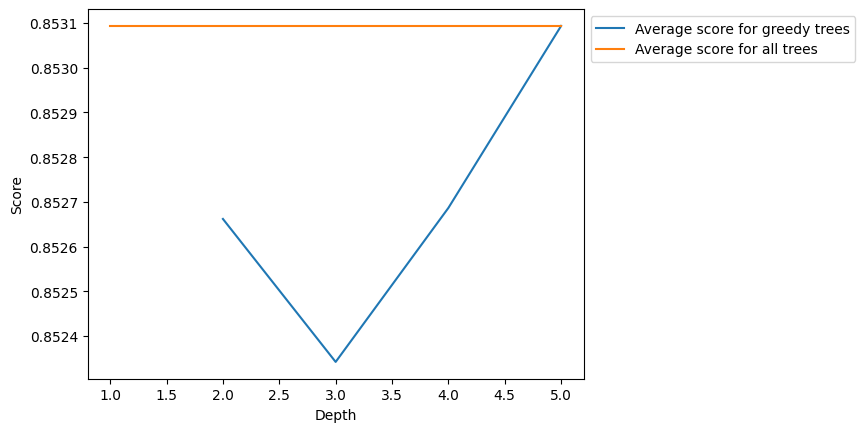

In [33]:
plt.plot(greedy_scores3.keys(), greedy_scores3.values(), 
        label="Average score for greedy trees")
plt.plot(greedy_scores3.keys(), [list(greedy_scores3.values())[-1]] * len(greedy_scores3.values()),
        label = "Average score for all trees")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

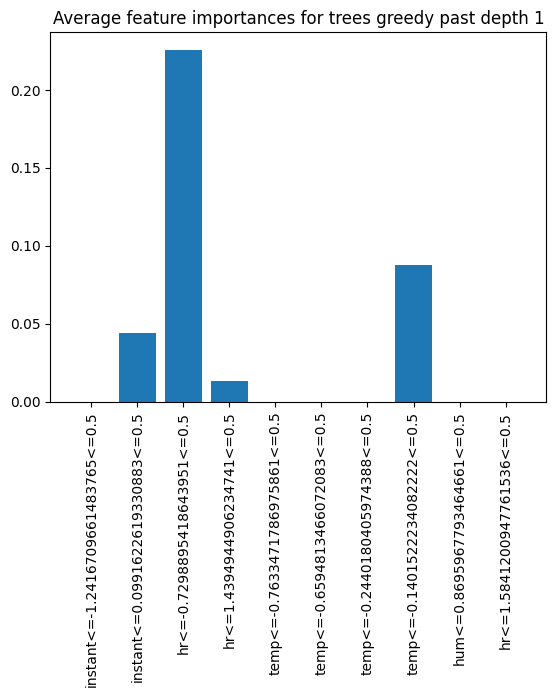

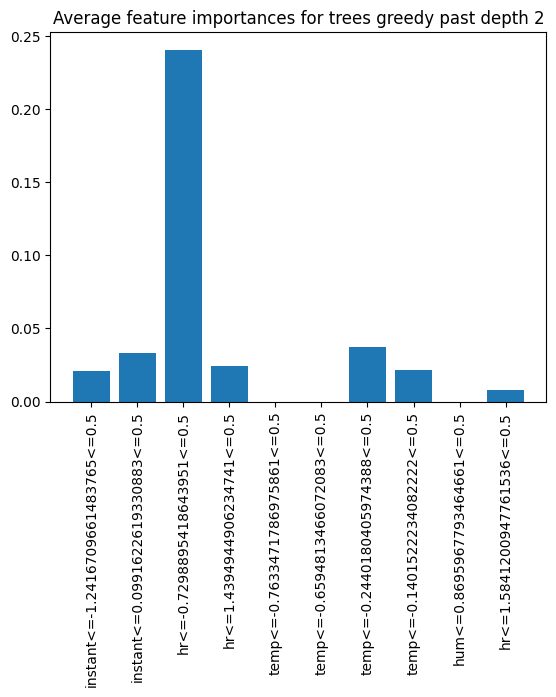

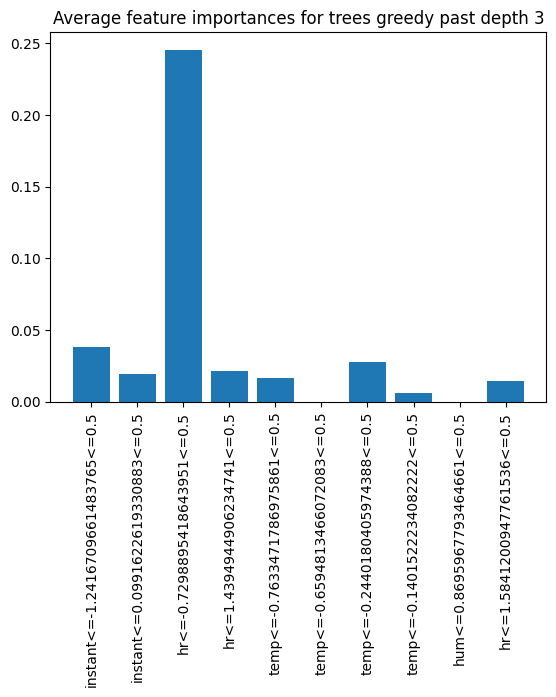

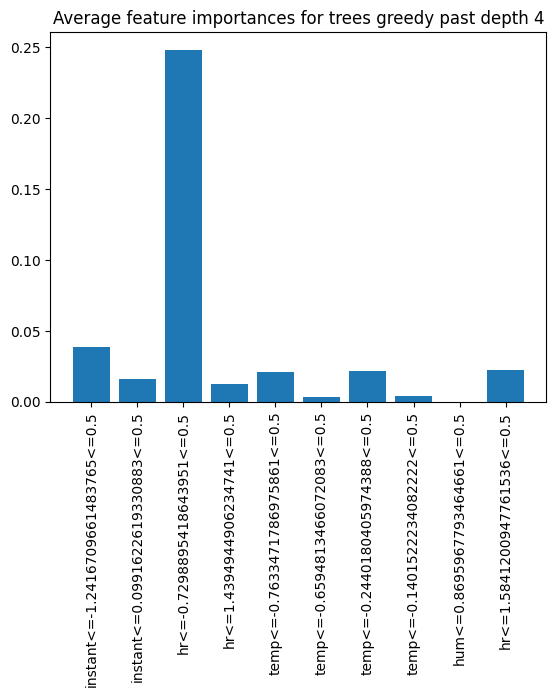

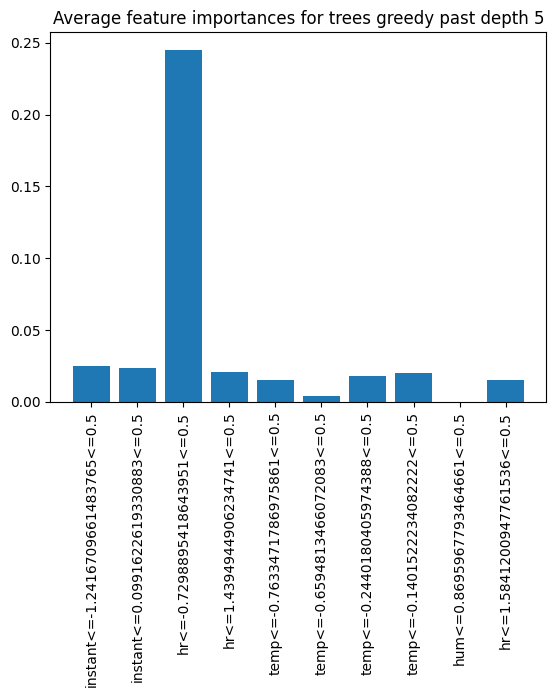

In [155]:
# threshold guessing
perm_importances_by_depth2 = {}

for depth in range(1, config2["depth_budget"] + 1): 
    perm_imps2 = pd.DataFrame(columns=bike_X_test_guessed.columns)
    if len(greedy_dict3[depth]) >= 20:
        sample_idxs = random.sample(greedy_dict3[depth], 20)
        for i, idx in enumerate(sample_idxs):
            perm_imps2.loc[i, :] = permutation_importance(bike_X_test_guessed, bike_y_test,
            model3_5[idx], reps=3)
    else:
        for i, idx in enumerate(greedy_dict3[depth]):  
            perm_imps2.loc[i, :] = permutation_importance(bike_X_test_guessed, bike_y_test, 
            model3_5[idx], reps=3)
    perm_importances_by_depth2[depth] = perm_imps2
    
    plt.figure()
    plt.bar(perm_imps2.columns, np.mean(perm_imps2, axis=0))
    plt.xticks(rotation=90)
    plt.title(f"Average feature importances for trees greedy past depth {depth}")
    plt.show()

In [ ]:
dict_perm_imps = {depth: df.to_dict() for depth, df in perm_importances_by_depth2.items()}
with open("perm_imps_bike_thresholds2.json", "w") as outfile:
    json.dump(dict_perm_imps, outfile)

In [35]:
# load permutation importances
with open("perm_imps_bike_thresholds2.json", "r") as infile:
    loaded_data = json.load(infile)

perm_importances_by_depth2 = {depth: pd.DataFrame(data) \
    for depth, data in loaded_data.items()}

/hpc/home/ts518/.local/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


Skipping depth 1 due to insufficient dimensions


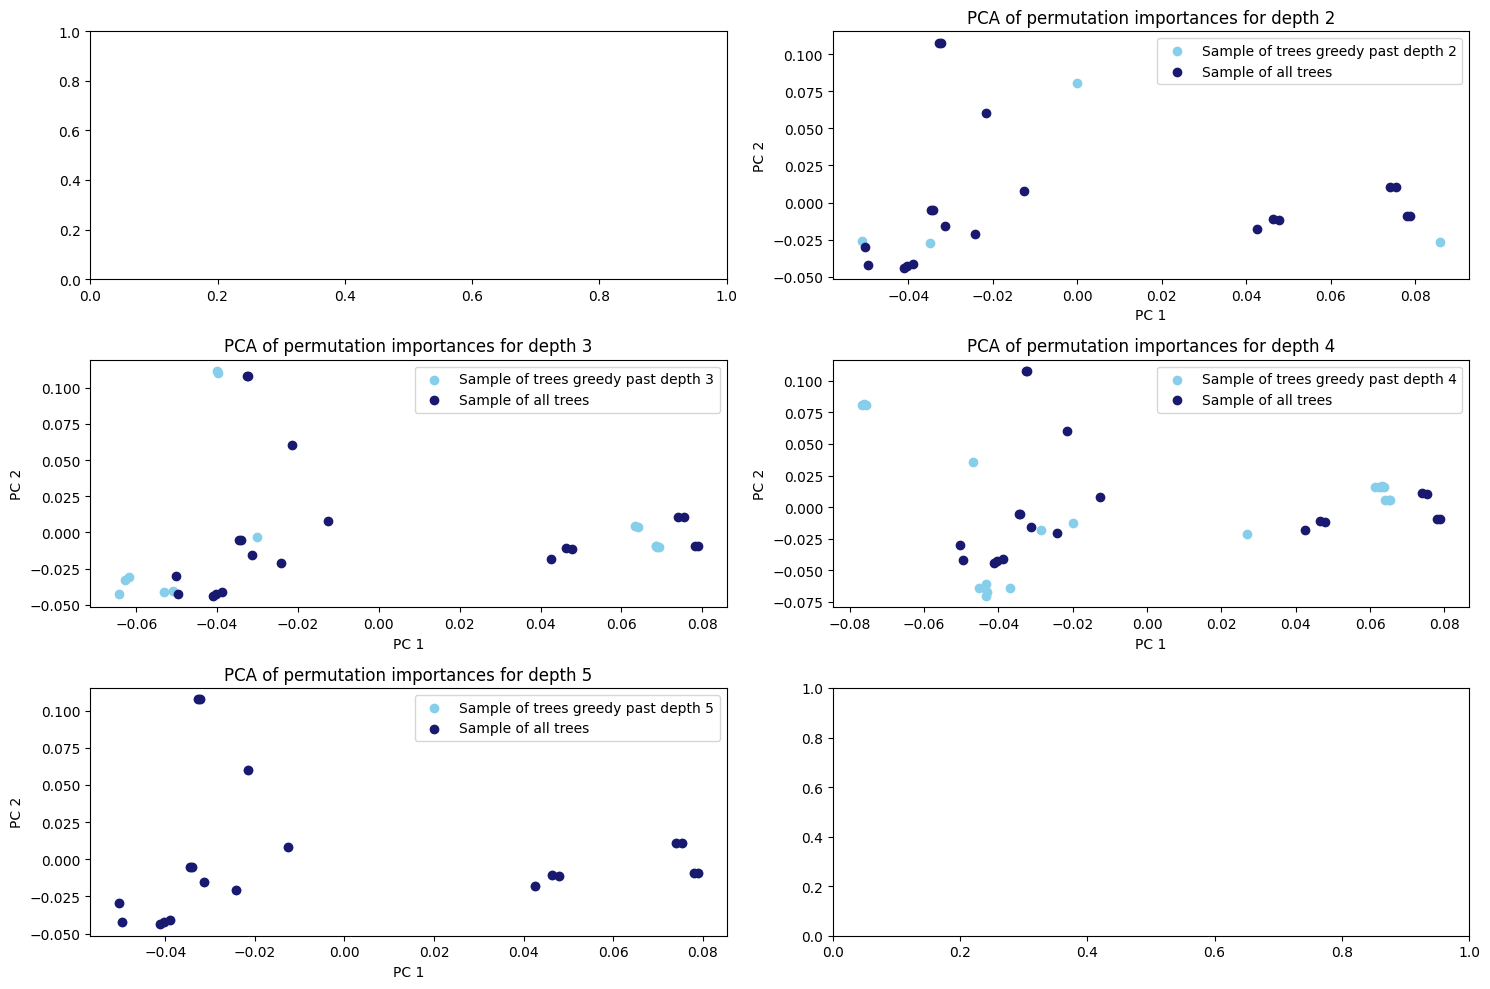

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten() 

for i, depth in enumerate(perm_importances_by_depth2):
    pca = PCA()
    Xt = pca.fit_transform(perm_importances_by_depth2[str(depth)])
    Xt_full = pca.fit_transform(perm_importances_by_depth2[str(config2["depth_budget"])])
    if Xt.shape[1] < 2:
        print(f"Skipping depth {depth} due to insufficient dimensions")
        continue
    ax = axes[i]
    ax.scatter(Xt[:, 0], Xt[:, 1], c="skyblue", label=f"Sample of trees greedy past depth {depth}")
    ax.scatter(Xt_full[:, 0], Xt_full[:, 1], c="midnightblue", label="Sample of all trees")
    ax.legend(bbox_to_anchor=(1, 1))
    ax.set_title(f"PCA of permutation importances for depth {depth}")
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")

plt.tight_layout()
plt.show()

## Compas dataset 2

In [37]:
compas_df = pd.read_csv("/hpc/group/csdept/ts518/treeFarms/experiments/datasets/compas_binary.csv")
compas_X, compas_y = compas_df.iloc[:, :-1], compas_df.iloc[:, -1]
compas_df

,Number_of_Priors<=0.5,Number_of_Priors<=1.5,Number_of_Priors<=2.5,Number_of_Priors<=3.5,Number_of_Priors<=5.5,Number_of_Priors<=6.5,Number_of_Priors<=7.5,Number_of_Priors<=8.5,Number_of_Priors<=12.5,Number_of_Priors<=15.5,...,score_factor<=0.5,Age_Above_FourtyFive<=0.5,Age_Below_TwentyFive<=0.5,African_American<=0.5,Asian<=0.5,Hispanic<=0.5,Native_American<=0.5,Female<=0.5,Misdemeanor<=0.5,Two_yr_Recidivism
0,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
2,0,0,0,0,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,1,1,1,1,0
6168,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,0
6169,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,0
6170,0,0,0,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,0,0,0


In [38]:
compas_X_train, compas_X_test, compas_y_train, compas_y_test = \
    train_test_split(compas_X, compas_y, test_size = 0.8)

In [39]:
compas_X_train_guessed, thresholds, header, threshold_guess_time = \
    compute_thresholds(compas_X_train.copy(), compas_y_train.copy(), 6, 4)
compas_X_test_guessed = cut(compas_X_test.copy(), thresholds)
compas_X_test_guessed = compas_X_test_guessed[header]

# compas_X_test_guessed.shape # 12 features

config3 = {'regularization': 0.01, 
            'rashomon_bound_multiplier': 0.05,
            'depth_budget':4}
model4 = TREEFARMS(config3)
model4.fit(compas_X_train_guessed, compas_y_train)

null
treefarms reported successful execution
training completed. Number of trees in the Rashomon set: 198


Finding Optimal Objective...
{
  "false": {
    "complexity": 0.009999999776482582,
    "loss": 0.21555915474891663,
    "name": "Two_yr_Recidivism",
    "prediction": 0
  },
  "feature": 1,
  "model_objective": 0.36521878838539124,
  "name": "Number_of_Priors<=2.5<=0.5",
  "reference": 1,
  "relation": "==",
  "true": {
    "complexity": 0.009999999776482582,
    "loss": 0.12965963780879974,
    "name": "Two_yr_Recidivism",
    "prediction": 1
  },
  "type": "integral"
}


In [41]:
greedy_dict4 = dict()
num_greedy4 = dict()

for depth in range(1, config3["depth_budget"] + 1):
    greedy_list = []
    for i in range(model4.model_set.get_tree_count()):
        greedy_list.append(check_greedy(model4[i], compas_X_train_guessed, compas_y_train, depth=depth))
    tree_ind = np.nonzero(greedy_list)[0].tolist()
    num_greedy4[depth] = sum(greedy_list)
    greedy_dict4[depth] = tree_ind

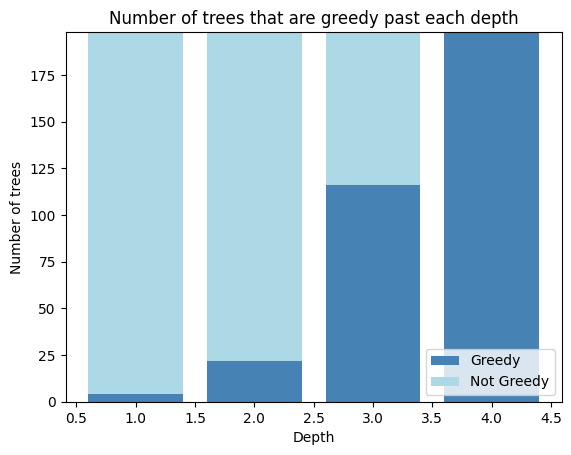

In [42]:
plt.bar(num_greedy4.keys(), num_greedy4.values(), 
        color = "steelblue", label = "Greedy")
plt.bar(num_greedy4.keys(), [(model4.model_set.get_tree_count() - value) for value in num_greedy4.values()],
        bottom=num_greedy4.values(), color='lightblue', label = "Not Greedy")

plt.title("Number of trees that are greedy past each depth")
plt.xlabel("Depth")
plt.ylabel("Number of trees")
plt.legend(loc="lower right")
plt.show()

In [43]:
greedy_scores4 = dict()
for depth in greedy_dict4:
    greedy_score = []
    for tree_ind in greedy_dict4[depth]:
        greedy_score.append(model4[tree_ind].score(compas_X_train_guessed, compas_y_train))
    greedy_scores4[depth] = np.mean(greedy_score)

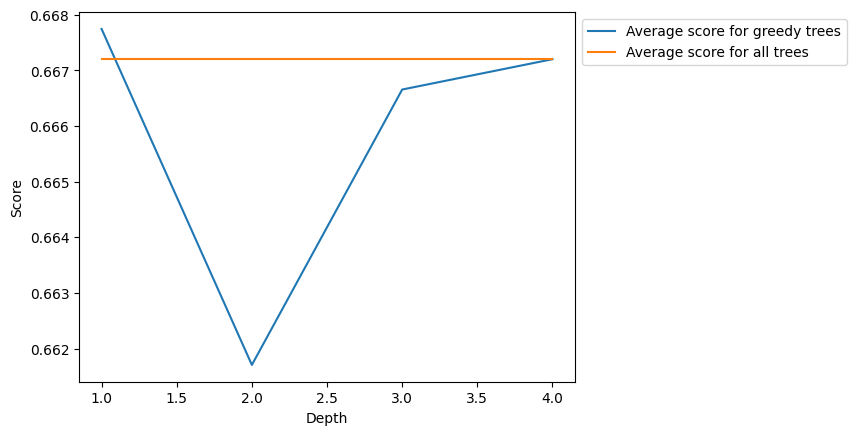

In [44]:
plt.plot(greedy_scores4.keys(), greedy_scores4.values(), 
        label="Average score for greedy trees")
plt.plot(greedy_scores4.keys(), [list(greedy_scores4.values())[-1]] * len(greedy_scores4.values()),
        label = "Average score for all trees")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

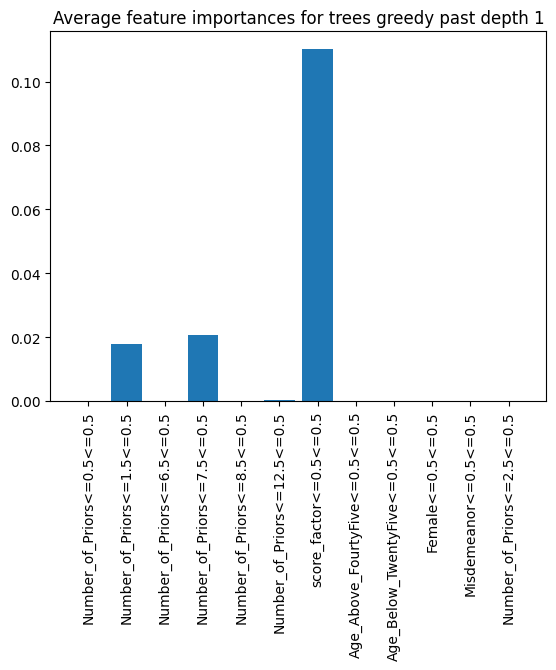

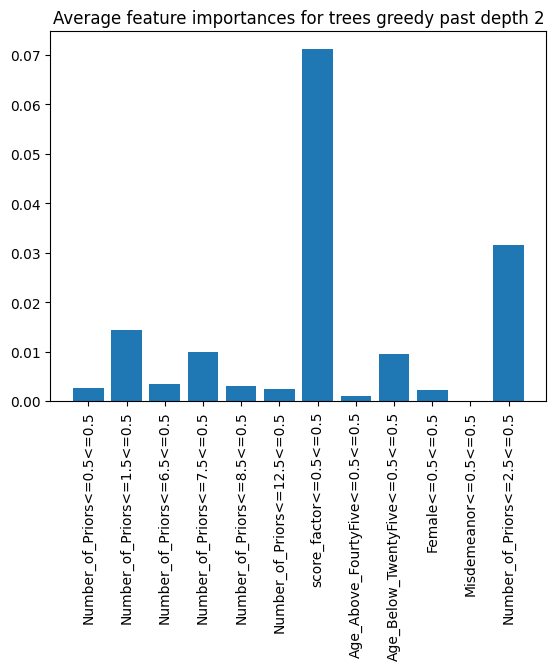

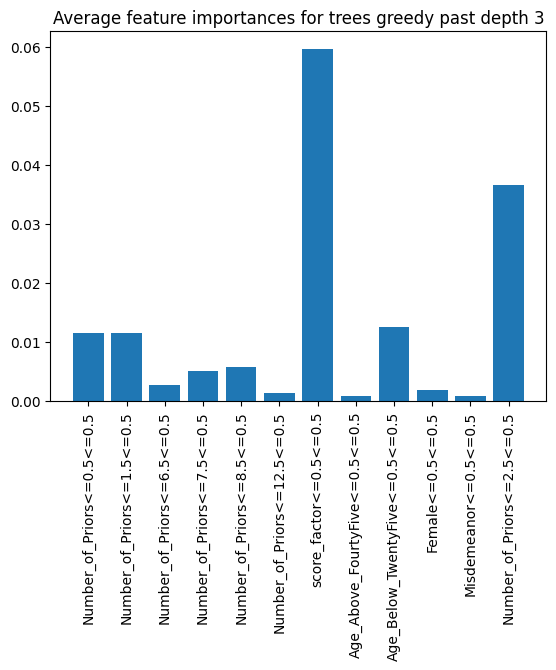

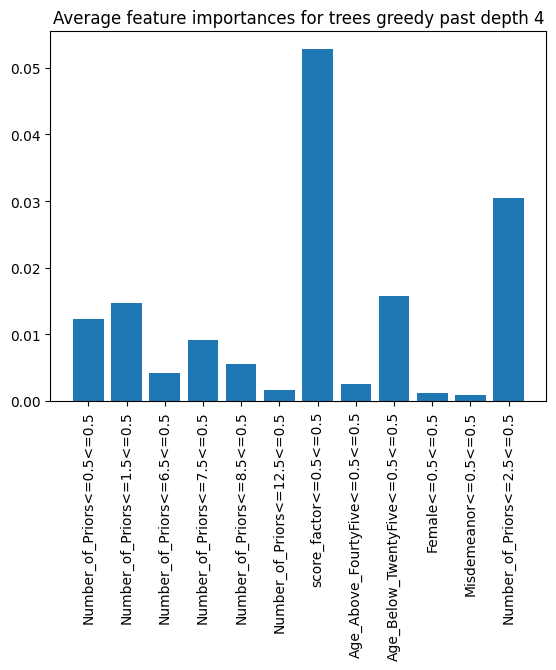

In [189]:
perm_importances_by_depth3 = {}

for depth in range(1, config3_5["depth_budget"] + 1): 
    perm_imps3 = pd.DataFrame(columns=compas_X_test_guessed.columns)
    if len(greedy_dict4[depth]) >= 20:
        sample_idxs = random.sample(greedy_dict4[depth], 20)
        for i, idx in enumerate(sample_idxs):
            perm_imps3.loc[i, :] = permutation_importance(compas_X_test_guessed, compas_y_test,
            model4[idx], reps=5)
    else:
        for i, idx in enumerate(greedy_dict4[depth]):  
            perm_imps3.loc[i, :] = permutation_importance(compas_X_test_guessed, compas_y_test, 
            model4[idx], reps=5)
    perm_importances_by_depth3[depth] = perm_imps3
    
    plt.figure()
    plt.bar(perm_imps3.columns, np.mean(perm_imps3, axis=0))
    plt.xticks(rotation=90)
    plt.title(f"Average feature importances for trees greedy past depth {depth}")
    plt.show()

In [ ]:
# save permutation importances
dict_perm_imps = {depth: df.to_dict() for depth, df in perm_importances_by_depth3.items()}
with open("perm_imps_compas.json", "w") as outfile:
    json.dump(dict_perm_imps, outfile)

In [45]:
# load permutation importances
with open("perm_imps_compas.json", "r") as infile:
    loaded_data = json.load(infile)

perm_importances_by_depth3 = {depth: pd.DataFrame(data) \
    for depth, data in loaded_data.items()}

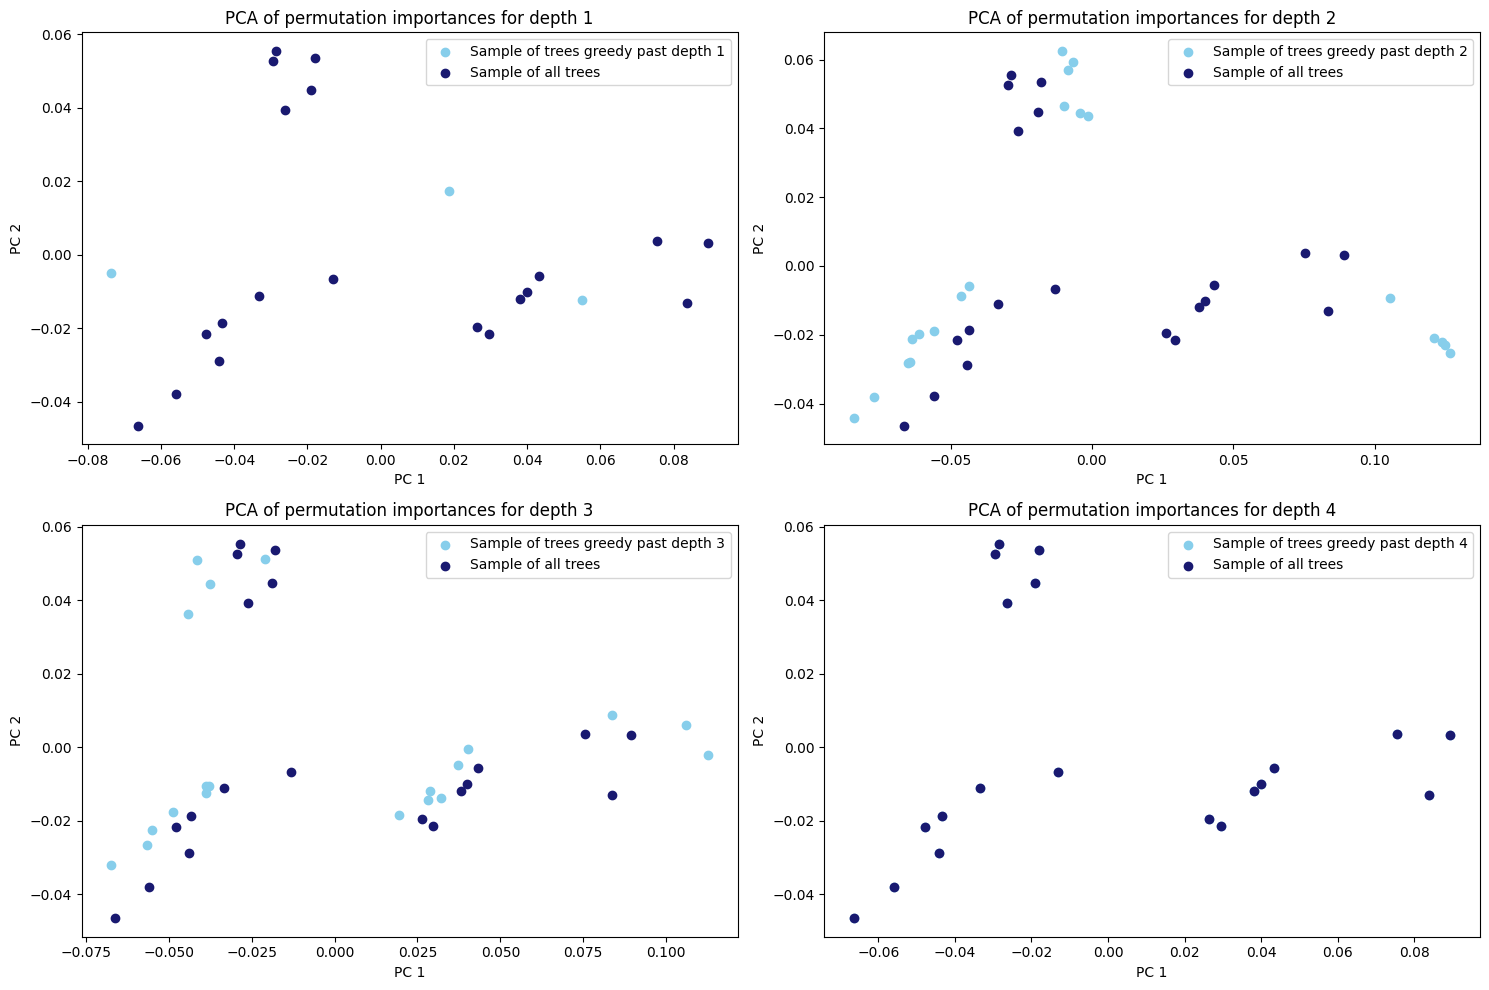

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten() 

for i, depth in enumerate(perm_importances_by_depth3):
    pca = PCA()
    Xt = pca.fit_transform(perm_importances_by_depth3[str(depth)])
    Xt_full = pca.fit_transform(perm_importances_by_depth3[str(config3["depth_budget"])])
    
    ax = axes[i]
    ax.scatter(Xt[:, 0], Xt[:, 1], c="skyblue", label=f"Sample of trees greedy past depth {depth}")
    ax.scatter(Xt_full[:, 0], Xt_full[:, 1], c="midnightblue", label="Sample of all trees")
    ax.legend(bbox_to_anchor=(1, 1))
    ax.set_title(f"PCA of permutation importances for depth {depth}")
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")

plt.tight_layout()
plt.show()